In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define some values 

l = 0.7e-2    # meters
p = 0.05     # xenon pressure in Torr, or 6.67 Pa
resistanceshield = 100     # ohms
resistanceplate = 10000     # ohms
resistanceshielderror = 5     # ohms
resistanceplateerror = 500     # ohms

In [3]:
# load in all data for set 1, make sure everything is in volts
# note: we removed the first data point of each forward set, as later on we must calculate sqrt(V - Vs) and Vs > V for the first data point

# room temperature forward
V = np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/V.txt')[1:]
roomVs = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/RVs.txt')[1:]
roomVserr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/RVserr.txt')[1:]
roomVp = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/RVp.txt')[1:]
roomVperr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/RVperr.txt')[1:]

# frozen out forward
frozenVs = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/FVs.txt')[1:]
frozenVserr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/FVserr.txt')[1:]
frozenVp = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/FVp.txt')[1:]
frozenVperr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/FVperr.txt')[1:]

# reverse data
reverseV = np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/Vrev.txt')
reverseVs = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/Vsrev.txt')
reverseVserr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/Vsreverr.txt')
reverseVp = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/Vprev.txt')
reverseVperr = (0.001)*np.loadtxt('C:/Users/tiern/OneDrive/Documents/2nd semester/PHYC30320/Ramsauer Townsend/data/Set1/Vpreverr.txt')

In [4]:
# calculating errors

# current I
def Ierr(I, v, dv, r, dr):    # I, v, dr are arrays but r and dr are simply integers
    ans=np.zeros(len(v))
    for i in range(0,len(ans)):
        ans[i]=I[i]*np.sqrt((dv[i]/v[i])**2 + (dr/r)**2 )
    return ans

# scattering probability P
def Perr(P, RIs, dRIs, RIp, dRIp, FIs, dFIs, FIp, dFIp):   # R and F denote room temperature and frozen data respectively
    ans=np.zeros(len(P))
    for i in range(0,len(ans)):
        ans[i]=P[i]*np.sqrt((dRIs[i]/RIs[i])**2 + (dRIp[i]/RIp[i])**2 + (dFIs[i]/FIs[i])**2 + (dFIp[i]/FIp[i])**2)
    return ans

# contact potential Vc
def Verr(V, m1, dm1, c1, dc1, m2, dm2, c2, dc2):
    return V*np.sqrt((dm1/m1)**2 + (dc1/c1)**2 + (dm2/m2)**2 + (dc2/c2)**2)

# electron momentum
def emerr(em, Vs, dVs, Vcontact, dVcontact, Venergy, dVenergy):
    ans=np.zeros(len(Vs))
    for i in range(0,len(ans)):
        ans[i]=(0.5)*em[i]*np.sqrt((dVs[i]/Vs[i])**2 + (dVcontact/Vcontact)**2 + (dVenergy/Venergy)**2)
    return ans

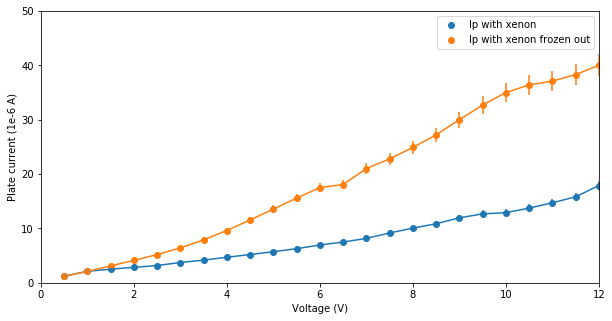

In [10]:
# Graph 1

roomIp = roomVp/resistanceplate
frozenIp = frozenVp/resistanceplate
roomIperr = Ierr(roomIp,roomVp,roomVperr,resistanceplate,resistanceplateerror)
frozenIperr = Ierr(frozenIp,frozenVp,frozenVperr,resistanceplate,resistanceplateerror)

plt.figure(figsize = (10,5))
plt.errorbar(V,roomIp*(1e6),yerr=roomIperr*(1e6))
plt.scatter(V,roomIp*(1e6),label='Ip with xenon')
plt.errorbar(V,frozenIp*(1e6),yerr=frozenIperr*(1e6))
plt.scatter(V,frozenIp*(1e6),label='Ip with xenon frozen out')
plt.ylabel('Plate current (1e-6 A)')
plt.xlabel('Voltage (V)')
plt.xlim(0,12)    # only in these limits can we see the difference made by freezing xenon out
plt.ylim(0,50)    # remove these limits to see the rapid growth of roomIp after V=12 volts
plt.legend();

Text(0.5, 0, 'Electron momentum (sqrt(V))')

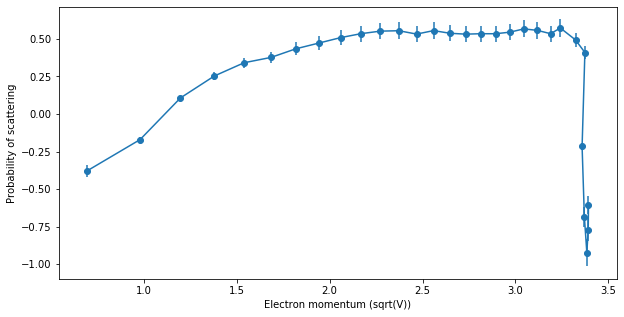

In [11]:
# Graph 2

roomIs = roomVs/resistanceshield
frozenIs = frozenVs/resistanceshield
roomIserr = Ierr(roomIs,roomVs,roomVserr,resistanceshield,resistanceshielderror)
frozenIserr = Ierr(frozenIs,frozenVs,frozenVserr,resistanceshield,resistanceshielderror)

# probability of scattering
Ps = 1 - (roomIp*frozenIs)/(frozenIp*roomIs)
Pserr = Perr(Ps, roomIs, roomIserr, roomIp, roomIperr, frozenIs, frozenIserr, frozenIp, frozenIperr)

emomentum = np.sqrt(V - roomVs)
emomentumerr = (0.5)*emomentum*(roomVserr/roomVs)

plt.figure(figsize = (10,5))
plt.errorbar(emomentum,Ps,xerr=emomentumerr,yerr=Pserr)
plt.scatter(emomentum,Ps)
plt.ylabel('Probability of scattering')
plt.xlabel('Electron momentum (sqrt(V))')
#plt.ylim(0,1);

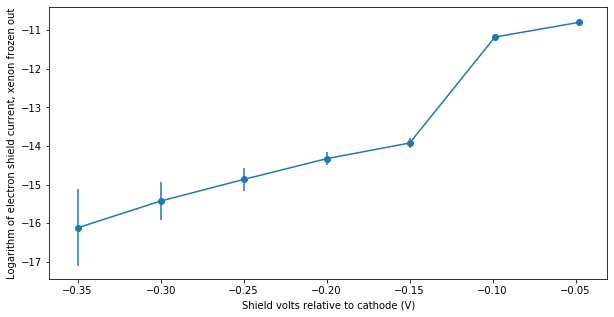

In [14]:
# Graph 3

reverseIs = reverseVs[:7]/resistanceshield   # remove data points with 0 Vs to allow for log of values to be found
reverseIserr = Ierr(reverseIs,reverseVs[:7],reverseVserr[:7],resistanceshield,resistanceshielderror)

plt.figure(figsize = (10,5))
plt.errorbar(reverseVs[:7]-reverseV[:7], np.log(reverseIs), xerr=reverseVserr[:7], yerr=reverseIserr/reverseIs)
plt.scatter(reverseVs[:7]-reverseV[:7], np.log(reverseIs))
plt.ylabel('Logarithm of electron shield current, xenon frozen out')
plt.xlabel('Shield volts relative to cathode (V)');

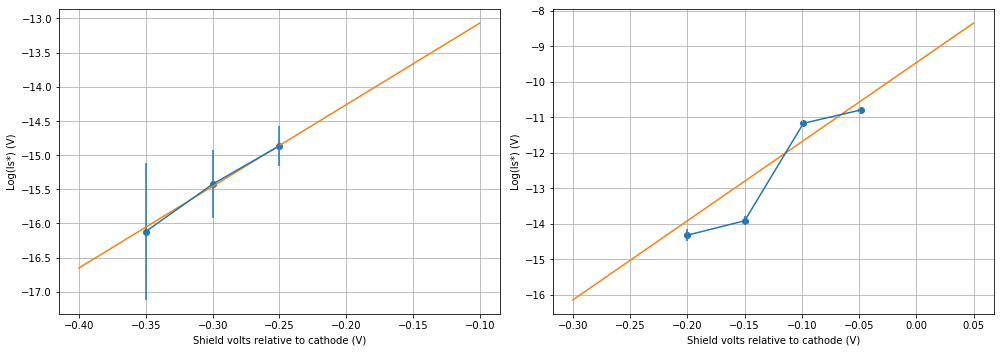

In [58]:
# finding Vc and Ve from graph 3

from scipy.optimize import curve_fit

def func(x, m, c):
    return m*x + c

reverseIs1 = reverseIs[4:]
reverseIs2 = reverseIs[:4]
a = reverseVs[:7]
b = reverseVserr[:7]
d = reverseV[:7]
reverseIserr1 = Ierr(reverseIs1,a[4:],b[4:],resistanceshield,resistanceshielderror)
reverseIserr2 = Ierr(reverseIs2,a[:4],b[:4],resistanceshield,resistanceshielderror)

m1 = 10
c1 = -12.5
m2 = 12
c2 = -11

x1=np.linspace(-0.4,-0.1,1000)
x2=np.linspace(-0.3,0.05,1000)
guess1=np.array([m1,c1])   # manipulate until a good estimate for line parameters has been found
guess2=np.array([m2,c2])
popt1, pcov1=curve_fit(func, a[4:]-d[4:], np.log(reverseIs1), p0=guess1, sigma=reverseIserr1/reverseIs1, absolute_sigma=True)
popt2, pcov2=curve_fit(func, a[:4]-d[:4], np.log(reverseIs2), p0=guess2, sigma=reverseIserr2/reverseIs2, absolute_sigma=True)
yfit1 = func(x1, popt1[0], popt1[1])
yfit2 = func(x2, popt2[0], popt2[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5)) 

ax1.errorbar(a[4:]-d[4:], np.log(reverseIs1), xerr=b[4:], yerr=reverseIserr1/reverseIs1)
ax1.scatter(a[4:]-d[4:], np.log(reverseIs1)) 
#ax1.plot(x1,func(x1,m1,c1))
ax1.plot(x1,yfit1)
ax1.set(ylabel = 'Log(Is*) (V)', xlabel = 'Shield volts relative to cathode (V)') 

ax2.errorbar(a[:4]-d[:4], np.log(reverseIs2), xerr=b[:4], yerr=reverseIserr2/reverseIs2)
ax2.scatter(a[:4]-d[:4], np.log(reverseIs2)) 
#ax2.plot(x2,func(x2,m2,c2))
ax2.plot(x2,yfit2)
ax2.set(ylabel = 'Log(Is*) (V)', xlabel = 'Shield volts relative to cathode (V)') 

plt.tight_layout()

ax1.grid()
ax2.grid();

In [59]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for function 1

from scipy.stats import chi2 

def chi2func1(x,y,yerr):
    yexpected=func(x, popt1[0], popt1[1])
    return np.sum(np.square((y-yexpected)/yerr))

a1=chi2func1(a[4:]-d[4:], np.log(reverseIs1), reverseIserr1/reverseIs1)   # chi2 value
v1=len(reverseIs1)-2   # number of constraints = 2
rchi21=a1/v1   # reduced chi2 value
P1=chi2.sf(a1, v1)  # P value

print('chi2=' ,a1)
print('reduced chi2=' ,rchi21)
print('P-value=' ,P1)

chi2= 0.008512020122001364
reduced chi2= 0.008512020122001364
P-value= 0.9264909836638862


In [60]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for function 2

from scipy.stats import chi2 

def chi2func2(x,y,yerr):
    yexpected=func(x, popt2[0], popt2[1])
    return np.sum(np.square((y-yexpected)/yerr))

a2=chi2func2(a[:4]-d[:4], np.log(reverseIs2), reverseIserr2/reverseIs2)   # chi2 value
v2=len(reverseIs2)-2   # number of constraints = 2
rchi22=a2/v2   # reduced chi2 value
P2=chi2.sf(a2, v2)  # P value

print('chi2=' ,a2)
print('reduced chi2=' ,rchi22)
print('P-value=' ,P2)

chi2= 208.82431567047223
reduced chi2= 104.41215783523612
P-value= 4.51207186903595e-46


In [65]:
popt2

array([22.276458 , -9.4676079])

V thermionic= 1.19395e+01 (+-) 8.270e+00 V
V contact= -2.32942e-01 (+-) -1.674e-01 V


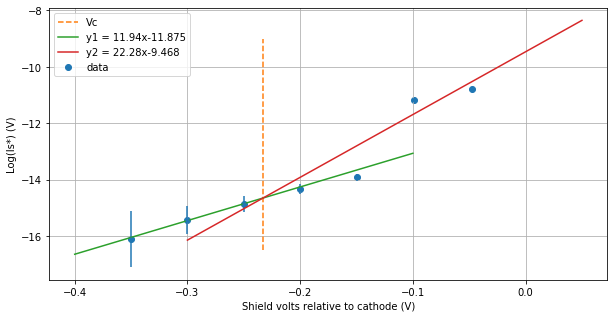

In [67]:
# finding Vc and Ve and visualising it

Vc = (popt2[1]-popt1[1])/(popt1[0]-popt2[0])
Vcerr = Verr(Vc, popt1[0], np.sqrt(pcov1[0,0]), popt1[1], np.sqrt(pcov1[1,1]), popt2[0], np.sqrt(pcov2[0,0]), popt2[1], np.sqrt(pcov2[1,1]))
Ve = popt1[0]
Veerr = np.sqrt(pcov1[0,0])

plt.figure(figsize = (10,5))
plt.errorbar(a-d, np.log(reverseIs), xerr=b, fmt='.', yerr=reverseIserr/reverseIs)
plt.scatter(a-d, np.log(reverseIs), label='data')
plt.plot(Vc*np.ones(1000),np.linspace(-16.5,-9,1000), '--', label='Vc')
plt.plot(x1,yfit1, label='y1 = 11.94x-11.875')
plt.plot(x2,yfit2, label='y2 = 22.28x-9.468')
plt.ylabel('Log(Is*) (V)')
plt.xlabel('Shield volts relative to cathode (V)')
plt.grid()
plt.legend()

print('V thermionic= ' f'{Ve:.5e} (+-) {Veerr:.3e} V')
print('V contact= ' f'{Vc:.5e} (+-) {Vcerr:.3e} V');

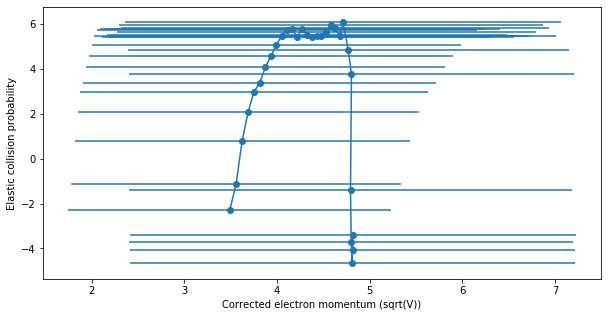

In [68]:
# Graph 4

# elastic collision probability
Pc = -p/l*np.log(1-Ps)
Pcerr = Pserr/Ps
emomentumfinal = np.sqrt(V - roomVs + Vc + Ve)
emomentumfinalerr = emerr(emomentumfinal, roomVs, roomVserr, Vc, Vcerr, Ve, Veerr)

plt.figure(figsize = (10,5))
plt.errorbar(emomentumfinal,Pc, xerr=emomentumfinalerr, yerr=Pcerr)
plt.scatter(emomentumfinal,Pc)
plt.ylabel('Elastic collision probability')
plt.xlabel('Corrected electron momentum (sqrt(V))')
plt.xlim()
plt.ylim();

In [12]:
# to calculate the mean free path (mfp) at all probability points
mfp = -l/np.log(1-Ps)
#print(mfp[i])